In [1]:
# Este exemplo carrega a base Wine da UCI, treina uma árvode de decisão usando
# holdout e outra usando validação cruzada com 10 pastas.
# Importa bibliotecas necessárias
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
import pydotplus
import ssl
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

/home/svncjus/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
X_full, y_full = fetch_california_housing(return_X_y=True)
# ~2k samples is enough for the purpose of the example.
# Remove the following two lines for a slower run with different error bars.
X = X_full[::10]
y = y_full[::10]
n_samples, n_features = X_full.shape

In [3]:
# Holdout 70% treinamento e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=0) 

In [4]:
# Declara a árvore de regressão
regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=30, min_samples_leaf=10,
random_state=0)

In [5]:
# Treina a árvore de regressão
regressor.fit(X_train, y_train)
output_prediction = regressor.predict(X_test) 

In [6]:
# Imprime os resultados do experimento baseado em holdout
print("\nAvaliação utilizando Holdout com 30% para teste")
print("R2 score: %.2f" % r2_score(y_test, output_prediction))


Avaliação utilizando Holdout com 30% para teste
R2 score: 0.57


In [7]:
# Validação Cruzuzada com 3 folds
#declara uma nova árvore de regressão
regressor1 = DecisionTreeRegressor(max_depth=5, min_samples_split=30, min_samples_leaf=10,
random_state=0) 

In [8]:
# define a quantidade de folds ou pastas e executa a validação cruzada
folds=3
result = cross_validate(regressor1, X, y, cv=folds) 

In [9]:
# Imprime os resultados da validação cruzada
print("\nAvaliação usando Validação Cruzada com %d folds" % folds)
print("R2 scores = " + str(result))
print("R2 score médio: %.2f" % (result['test_score'].mean())) 


Avaliação usando Validação Cruzada com 3 folds
R2 scores = {'fit_time': array([0.00776362, 0.0070653 , 0.00544333]), 'score_time': array([0.00166917, 0.00167131, 0.0009253 ]), 'test_score': array([0.53602748, 0.55330147, 0.40370684])}
R2 score médio: 0.50



Árvore Gerada no experimento baseado em Holdout


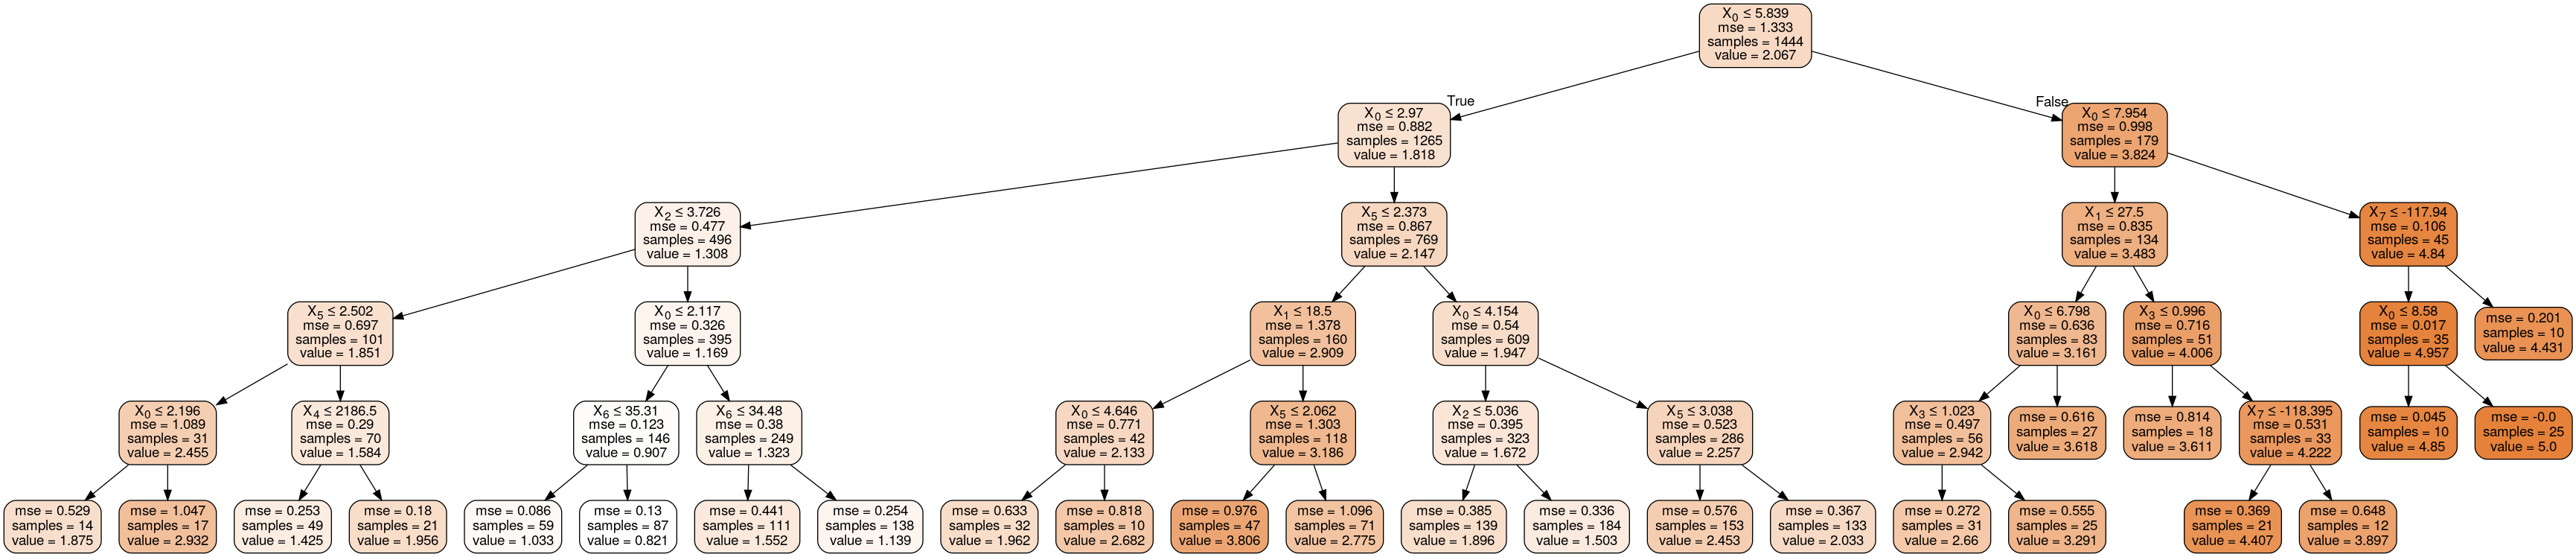

In [10]:
# Imprime a árvore de regressão gerada
print("\nÁrvore Gerada no experimento baseado em Holdout")
dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data,
 filled=True, rounded=True,
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
im=Image(graph.create_png())
display(im) 